In [48]:
import numpy as np
import networkx as nx
from sklearn.neighbors import kneighbors_graph
from tests import *

X = synthetic_subspace(D=20,d=5,n=10000)
k = 5 # number of neighbors we're using

knn_graph = kneighbors_graph(X, n_neighbors=k, mode='distance', include_self=False)

G = nx.from_scipy_sparse_matrix(knn_graph, edge_attribute='weight')

In [49]:
def bfs_levels(G, start):
    """
    Perform BFS using networkx and return nodes grouped by level.
    
    Parameters:
        G (networkx.Graph): The input graph.
        start (node): Starting node.
        
    Returns:
        levels (list of lists): [[level0_nodes], [level1_nodes], ...]
    """
    visited = set()
    queue = [(start, 0)]  # (node, level)
    levels = []

    while queue:
        node, level = queue.pop(0)
        if len(levels) <= level:
            levels.append([])

        if node not in visited:
            visited.add(node)
            levels[level].append(node)
            for neighbor in G.neighbors(node):
                if neighbor not in visited:
                    queue.append((neighbor, level + 1))

    return levels

In [50]:
levels = bfs_levels(G, 0)

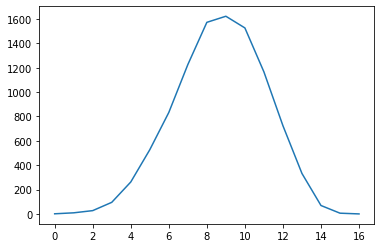

In [51]:
import matplotlib.pyplot as plt

# size of level
sizes = [  len(level)  for level in levels]
plt.plot(sizes)

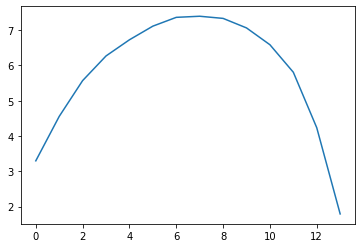

In [52]:
log_sizes = [  math.log( len(level))  for level in levels[2:-1]]
plt.plot(log_sizes)

2.4071465580607185


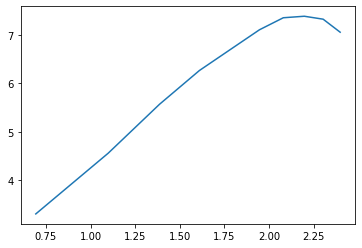

In [53]:
x = [math.log(i) for i in range(2,12)]
y = log_sizes[:10]

plt.plot(x,y)


from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(np.array(x).reshape((-1,1)), y)

# Get slope and intercept
slope = model.coef_[0]
print(slope)